# Plotting Di-Higgs vs. QCD Features
In this notebook, QCD plots are warm colors because Di-Higgs events are more ~cool~

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import csv
from scipy.stats import norm
from scipy import stats
import matplotlib.mlab as mlab
import numpy as np
from scipy.optimize import curve_fit

In [12]:
##############################################################
##                    FUNCTION TIME BABEY                   ##
##############################################################

def gaussian_fit(x, B, mu, sigma):
    #     return  mu*x + sigma/B
    #     return  B* np.exp(-1.0 * ((x - mu)**2) / (2 * sigma**2))
        return (B*np.exp(-1*((x - mu)**2)/ (2*sigma**2)))

def plotHistWithFitLine(_fitFunction, _bins, _histFrequencies, _label, _color, _boundsTuple, _p0, plotFit=True):
    """Plots a histogram with a fit line over the specified bounds"""
    bins = _bins
    _binCenters = bins + ((bins[1]-bins[0])/2)
    _binCenters = _binCenters[:-1]
    plt.bar(_binCenters, _histFrequencies, width=bins[1] - bins[0], color=_color, alpha=.25,label=_label)
    
    if(plotFit==True):
        #define bounds for fit line
        lb = _boundsTuple[0]
        hb = _boundsTuple[1]

        ## Di Higgs
        ydata = _histFrequencies[lb:hb]
        xvals = _binCenters[lb:hb]
        p0=_p0
        popt, pcov = curve_fit(gaussian_fit, xdata=xvals, ydata=ydata,  p0=p0)
        print(_label, "fit parameters", popt)
        fit_label = _label + " best fit"
    #     # Plot the histogram and the fitted function.
        plt.plot(xvals, gaussian_fit(xvals, *popt), color=_color, linewidth=2.5, linestyle='dashed', label=fit_label)
    

In [13]:
qcd = pd.read_csv('qcd_outputDataForLearning.csv')
hh = pd.read_csv('dihiggs_outputDataForLearning.csv')

In [14]:
print(len(qcd), "rows of qcd data")
qcd.head()

3406 rows of qcd data


,hh_mass,h1_mass,h2_mass,hh_pt,h1_pt,h2_pt,"deltaR(h1, h2)",deltaR(h1 jets),deltaR(h2 jets),deltaPhi(h1 jets),...,jet3_pz,jet4_pz,jet1_energy,jet2_energy,jet3_energy,jet4_energy,jet1_btag,jet2_btag,jet3_btag,jet4_btag
0,389.560210,124.325608,111.570920,136.932891,171.988626,109.203811,2.559584,2.308070,1.890789,2.144129,...,2.297561,-76.250394,220.464571,21.970768,88.955955,83.794049,1,1,1,1
1,647.207817,44.270179,50.027954,20.930002,157.928581,140.624963,4.146202,0.535946,0.671977,-0.502355,...,-93.650177,-108.175850,265.363449,158.046447,132.001760,119.019995,1,1,1,1
2,322.208428,26.864315,97.050753,38.709715,135.583186,144.740330,2.925384,0.500025,1.247225,0.452056,...,53.848765,-42.742465,137.378936,28.336301,93.615332,81.004145,1,1,1,1
3,419.258968,52.990523,68.470152,41.059689,164.301699,125.246712,3.489830,0.856370,1.418455,0.779506,...,-57.489281,7.752531,293.246702,35.669705,129.070096,22.087586,1,1,1,1
4,500.859412,50.131320,102.613244,26.595028,185.256231,187.008176,3.293268,0.639606,1.084399,0.450668,...,-66.474735,26.027230,359.636926,109.941192,149.078860,68.032946,1,1,1,1


In [15]:
print(len(hh), "rows of dihiggs data")
hh.head()
list(hh)

9206 rows of dihiggs data


['hh_mass',
 'h1_mass',
 'h2_mass',
 'hh_pt',
 'h1_pt',
 'h2_pt',
 'deltaR(h1, h2)',
 'deltaR(h1 jets)',
 'deltaR(h2 jets)',
 'deltaPhi(h1 jets)',
 'deltaPhi(h2 jets)',
 'met',
 'met_phi',
 'scalarHT',
 'nJets',
 'nBTags',
 'jet1_pt',
 'jet2_pt',
 'jet3_pt',
 'jet4_pt',
 'jet1_eta',
 'jet2_eta',
 'jet3_eta',
 'jet4_eta',
 'jet1_phi',
 'jet2_phi',
 'jet3_phi',
 'jet4_phi',
 'jet1_mass',
 'jet2_mass',
 'jet3_mass',
 'jet4_mass',
 'jet1_px',
 'jet2_px',
 'jet3_px',
 'jet4_px',
 'jet1_py',
 'jet2_py',
 'jet3_py',
 'jet4_py',
 'jet1_pz',
 'jet2_pz',
 'jet3_pz',
 'jet4_pz',
 'jet1_energy',
 'jet2_energy',
 'jet3_energy',
 'jet4_energy',
 'jet1_btag',
 'jet2_btag',
 'jet3_btag',
 'jet4_btag']

# Higgs Features

Di Higgs fit parameters [3.49272705e-03 3.42764388e+02 1.06145241e+02]
QCD fit parameters [2.68109990e-03 3.84913372e+02 1.30547102e+02]


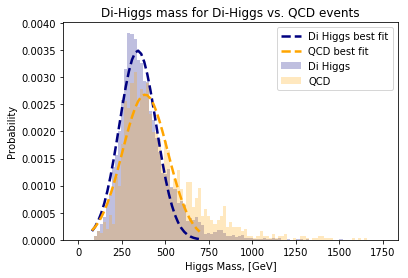

<Figure size 432x288 with 0 Axes>

In [46]:
##############################################################
##                  NORMED HH MASS PER EVENT                 ##
##############################################################

# best fit of data
(mu_hh, sigma_hh) = norm.fit(hh.hh_mass)
(mu_qcd, sigma_qcd) = norm.fit(qcd.hh_mass)

# get hist data for fitting
n_hh, bins_hh, patches = plt.hist(hh.hh_mass, density=1, facecolor='blue', alpha=0.25, label="Di-Higgs", bins=np.linspace(0, 1750, 100))
n_qcd, bins_qcd, patches = plt.hist(qcd.hh_mass, density=1, facecolor='red', alpha=0.25, label="Di-Higgs", bins=np.linspace(0, 1750, 100))
plt.clf()

bins = bins_hh

#define bounds for fit line, 
# bounds are by bin
lbhh = 4
ubhh = 40

plotHistWithFitLine(gaussian_fit, bins, n_hh, "Di Higgs","navy", (lbhh,ubhh), [.03, 100, 10], True)

## QCD  
plotHistWithFitLine(gaussian_fit, bins, n_qcd, "QCD","orange", (lbhh,ubhh), [.03, 100, 10], True)

# Make the plot nicer.

plt.xlabel(r'Higgs Mass, [GeV]')
plt.ylabel(r'Probability')
plt.title("Di-Higgs mass for Di-Higgs vs. QCD events")
plt.legend(loc='best')


plt.show()
plt.clf()
### for this to properly run, it needs to be re run from the top of "normed HH mass"


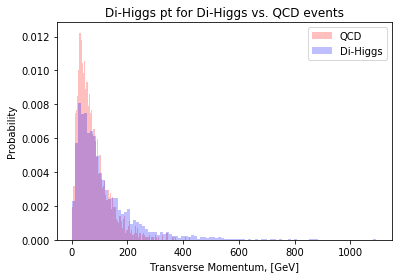

<Figure size 432x288 with 0 Axes>

In [47]:
##############################################################
##                 NORMED HH PT PER EVENT                 ##
##############################################################

plt.hist(qcd.hh_pt, color="red", density=1, bins=100, alpha=.25, label="QCD")
plt.hist(hh.hh_pt, color="blue", density=1, bins=100, alpha=.25, label="Di-Higgs")

# Make the plot nicer.
plt.title("Di-Higgs pt for Di-Higgs vs. QCD events")
plt.xlabel(r'Transverse Momentum, [GeV]')
plt.ylabel(r'Probability')
plt.legend(loc='best')

plt.show()
plt.clf()


Di Higgs fit parameters [1.54613920e-02 1.04686104e+02 2.13378875e+01]
QCD fit parameters [4.92135953e-03 1.03899547e+02 1.23711998e+02]


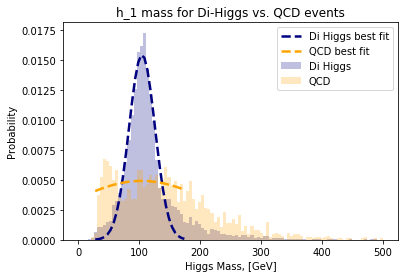

<Figure size 432x288 with 0 Axes>

In [48]:
##############################################################
##                NORMED H_1 MASS PER EVENT                 ##
##############################################################
# best fit of data
(mu_hh, sigma_hh) = norm.fit(hh.h1_mass)
(mu_qcd, sigma_qcd) = norm.fit(qcd.h1_mass)

# get hist data for fitting
n_hh, bins_hh, patches = plt.hist(hh.h1_mass, density=1, facecolor='blue', alpha=0.25, label="Di-Higgs", bins=np.linspace(0, 500, 100) )
n_qcd, bins_qcd, patches = plt.hist(qcd.h1_mass, density=1, facecolor='red', alpha=0.25, label="QCD", bins=np.linspace(0,500,num=100))
plt.clf()

bins = bins_hh

lbh1 = 5
ubh1 = 35

## Di Higgs
plotHistWithFitLine(gaussian_fit, bins, n_hh, "Di Higgs","navy", (lbh1,ubh1), [.03, 100, 10], True)

## QCD 
plotHistWithFitLine(gaussian_fit, bins, n_qcd, "QCD","orange", (lbh1,ubh1), [.03, 100, 10], True)

plt.xlabel(r'Higgs Mass, [GeV]')
plt.ylabel(r'Probability')
plt.title("h_1 mass for Di-Higgs vs. QCD events")
plt.legend(loc='best')

plt.show()
plt.clf()
### for this to properly run, it needs to be re run from the top of "normed H1 mass"

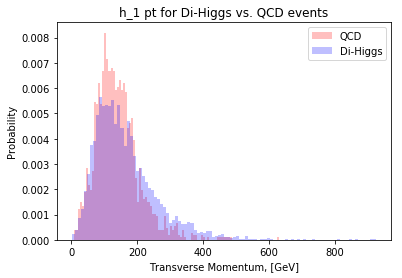

<Figure size 432x288 with 0 Axes>

In [49]:
##############################################################
##                 NORMED H1 PT PER EVENT                 ##
##############################################################

plt.hist(qcd.h1_pt, color="red", density=1, bins=100, alpha=.25, label="QCD")
plt.hist(hh.h1_pt, color="blue", density=1, bins=100, alpha=.25, label="Di-Higgs")

plt.title("h_1 pt for Di-Higgs vs. QCD events")
plt.xlabel(r'Transverse Momentum, [GeV]')
plt.ylabel(r'Probability')
plt.legend(loc='best')

plt.show()
plt.clf()

Di Higgs fit parameters [1.42694438e-02 9.78426775e+01 2.41754448e+01]
QCD fit parameters [6.44836516e-03 6.94567307e+01 7.66685912e+01]


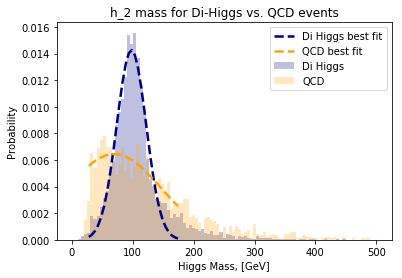

Di-Higgs mean h_2: 109.50724077635772
QCD mean h_2: 125.69872076444622


<Figure size 432x288 with 0 Axes>

In [50]:
##############################################################
##                NORMED H_2 MASS PER EVENT                 ##
##############################################################
# best fit of data
(mu_hh, sigma_hh) = norm.fit(hh.h2_mass)
(mu_qcd, sigma_qcd) = norm.fit(qcd.h2_mass)

# fit data for hist plotting
n_hh, bins_hh, patches = plt.hist(hh.h2_mass, density=1, bins=np.linspace(0, 500, 100) )
n_qcd, bins_qcd, patches = plt.hist(qcd.h2_mass, density=1, bins=np.linspace(0, 500, 100) )
plt.clf() # clear histogram plot to make space for best fit plot

bins = bins_hh # make bins param

lbh2 = 5  #define bounds for fit line, 
ubh2 = 35 # bounds are by bin

# make plots
plotHistWithFitLine(gaussian_fit, bins, n_hh, "Di Higgs","navy", (lbh2,ubh2), [.03, 100, 10], True) 
plotHistWithFitLine(gaussian_fit, bins, n_qcd, "QCD","orange", (lbh2,ubh2), [.03, 100, 10], True)

plt.xlabel(r'Higgs Mass, [GeV]')
plt.ylabel(r'Probability')
plt.title("h_2 mass for Di-Higgs vs. QCD events")
plt.legend(loc='best')

plt.show()
plt.clf()

### for this to properly run, it needs to be re run from the top of "normed H2 mass"

print("Di-Higgs mean h_2:", np.mean(hh.h2_mass))
print("QCD mean h_2:", np.mean(qcd.h2_mass))

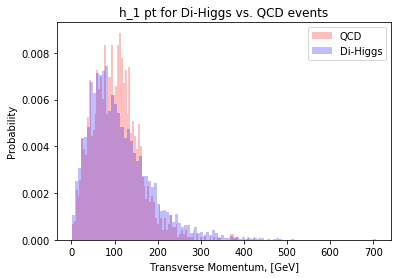

<Figure size 432x288 with 0 Axes>

In [51]:
##############################################################
##                 NORMED H2 PT PER EVENT                 ##
##############################################################

plt.hist(qcd.h2_pt, color="red", density=1, bins=100, alpha=.25, label="QCD")
plt.hist(hh.h2_pt, color="blue", density=1, bins=100, alpha=.25, label="Di-Higgs")

plt.title("h_1 pt for Di-Higgs vs. QCD events")
plt.xlabel(r'Transverse Momentum, [GeV]')
plt.ylabel(r'Probability')
plt.legend(loc='best')

plt.show()
plt.clf()

# Position Features
## TO DO
1. Change the cuts 
2. Re-plot these and see if Delta Phi becomes more uniform

In [22]:
#  'deltaR(h1, h2)',
#  'deltaR(h1 jets)',
#  'deltaR(h2 jets)',
#  'deltaPhi(h1 jets)',
#  'deltaPhi(h2 jets)',

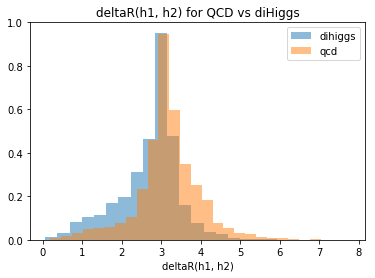

In [34]:
# deltaR(h1, h2)
plt.hist(hh['deltaR(h1, h2)'], label="dihiggs", alpha=0.5, density=1, bins=25)
plt.hist(qcd['deltaR(h1, h2)'], label="qcd", alpha=0.5, density=1, bins=25)
plt.title("deltaR(h1, h2) for QCD vs diHiggs")
plt.xlabel("deltaR(h1, h2)")
plt.legend()

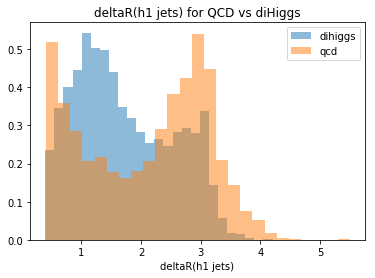

In [35]:
# deltaR(h1 jets)
plt.hist(hh['deltaR(h1 jets)'], label="dihiggs", alpha=0.5, density=1, bins=25)
plt.hist(qcd['deltaR(h1 jets)'], label="qcd", alpha=0.5, density=1, bins=25)
plt.title("deltaR(h1 jets) for QCD vs diHiggs")
plt.xlabel("deltaR between h1 jets")
plt.legend()

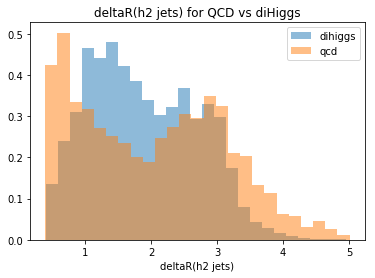

In [36]:
# deltaR(h2 jets)
plt.hist(hh['deltaR(h2 jets)'], label="dihiggs", alpha=0.5, density=1, bins=25)
plt.hist(qcd['deltaR(h2 jets)'], label="qcd", alpha=0.5, density=1, bins=25)
plt.title("deltaR(h2 jets) for QCD vs diHiggs")
plt.xlabel("deltaR between h2 jets")
plt.legend()

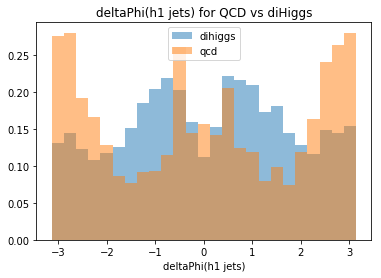

In [32]:
# deltaPhi(h1 jets)
plt.hist(hh['deltaPhi(h1 jets)'], label="dihiggs", alpha=0.5, density=1, bins=25)
plt.hist(qcd['deltaPhi(h1 jets)'], label="qcd", alpha=0.5, density=1, bins=25)
plt.title("deltaPhi(h1 jets) for QCD vs diHiggs")
plt.xlabel("deltaPhi(h1 jets)")
plt.legend()

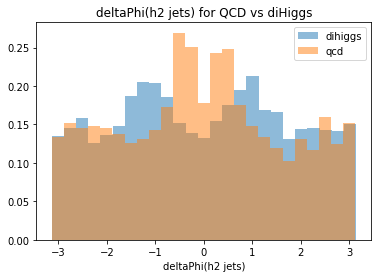

In [33]:
# deltaPhi(h2 jets)
plt.hist(hh['deltaPhi(h2 jets)'], label="dihiggs", alpha=0.5, density=1, bins=25)
plt.hist(qcd['deltaPhi(h2 jets)'], label="qcd", alpha=0.5, density=1, bins=25)
plt.title("deltaPhi(h2 jets) for QCD vs diHiggs")
plt.xlabel("deltaPhi(h2 jets)")
plt.legend()

# Event Features

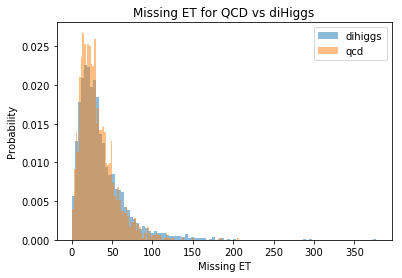

In [52]:
##############################################################
##                       MISSING ET                        ##
##############################################################
plt.hist(hh.met, label="dihiggs", alpha=0.5, density=1, bins=100)
plt.hist(qcd.met, label="qcd", alpha=0.5, density=1, bins=100)
plt.title("Missing ET for QCD vs diHiggs")
plt.ylabel("Probability")
plt.xlabel("Missing ET")
plt.legend()

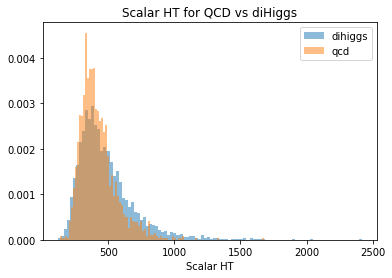

In [78]:
##############################################################
##                  NORMED SCALAR HT                        ##
##############################################################
plt.hist(hh.scalarHT, label="dihiggs", alpha=0.5, density=1, bins=100)
plt.hist(qcd.scalarHT, label="qcd", alpha=0.5, density=1, bins=100)
plt.title("Scalar HT for QCD vs diHiggs")
plt.xlabel("Scalar HT")
plt.ylabel("Probability")
plt.legend()

hh avg jet energy: 560.9 for 36824 jets || qcd avg jet energy: 619.4 for 13624 jets


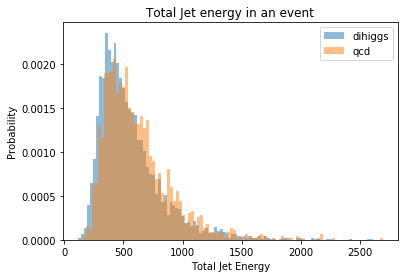

In [56]:
##############################################################
##                 JET ENERGY PER EVENT                     ##
##############################################################
hhE = hh.jet1_energy + hh.jet2_energy + hh.jet3_energy +hh.jet4_energy
qcdE = qcd.jet1_energy + qcd.jet2_energy + qcd.jet3_energy + qcd.jet4_energy
plt.hist(hhE, alpha=0.5, label="dihiggs", density=1, bins=100)
plt.hist(qcdE, alpha=0.5, label="qcd", density=1, bins=100)
plt.title("Total Jet energy in an event")
plt.legend()
plt.xlabel("Total Jet Energy")
plt.ylabel("Probability")
print("hh avg jet energy:", round((sum(hhE)/len(hhE)),1), "for", len(hhE)*4, "jets", "||", "qcd avg jet energy:", round((sum(qcdE)/len(qcdE)),1), "for", len(qcdE)*4, "jets")

Text(0.5, 0, 'Number of Jets')

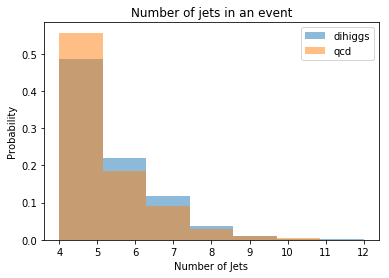

In [55]:
##############################################################
##                     N JETS PER EVENT                     ##
##############################################################
plt.hist(hh.nJets, alpha=0.5, label="dihiggs", bins=np.linspace(4, 12, 8), density=1)
plt.hist(qcd.nJets, alpha=0.5, label="qcd", bins=np.linspace(4, 12, 8), density=1)
plt.legend()
plt.title("Number of jets in an event")
plt.ylabel("Probability")
plt.xlabel("Number of Jets")

Text(0.5, 0, 'Number of Jets')

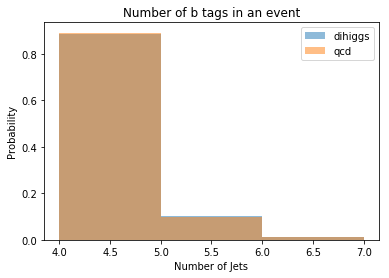

In [54]:
##############################################################
##                     B TAGS PER EVENT                     ##
##############################################################
plt.hist(hh.nBTags, alpha=0.5, label="dihiggs", bins=3, density=1)
plt.hist(qcd.nBTags, alpha=0.5, label="qcd", bins=3, density=1)
plt.legend()
plt.title("Number of b tags in an event")
plt.ylabel("Probability")
plt.xlabel("Number of Jets")